## Session 3:

## Spark-SQL and Dataframes
### Overview:
####  What is Spark SQL?
- Spark SQL is a Spark module for structured data processing. It provides a programming abstraction called DataFrames and can also act as a distributed SQL query engine. It enables unmodified Hadoop Hive queries to run up to 100x faster on existing deployments and data.
#### How the Spark SQL engine provides a unified foundation for the high-level DataFrame and Dataset APIs?
- Unifies Spark components and permits abstraction to DataFrames/Datasets in Java, Scala, Python, and R, which simplifies working with structured data sets.
- Connects to the Apache Hive metastore and tables.
- Reads and writes structured data with a specific schema from structured file formats (JSON, CSV, Text, Avro, Parquet, ORC, etc.) and converts data into temporary tables.
- Offers an interactive Spark SQL shell for quick data exploration.
- Provides a bridge to (and from) external tools via standard database JDBC/ODBC connectors.
- Generates optimized query plans and compact code for the JVM, for final execution.

#### Spark SQL and its stack

 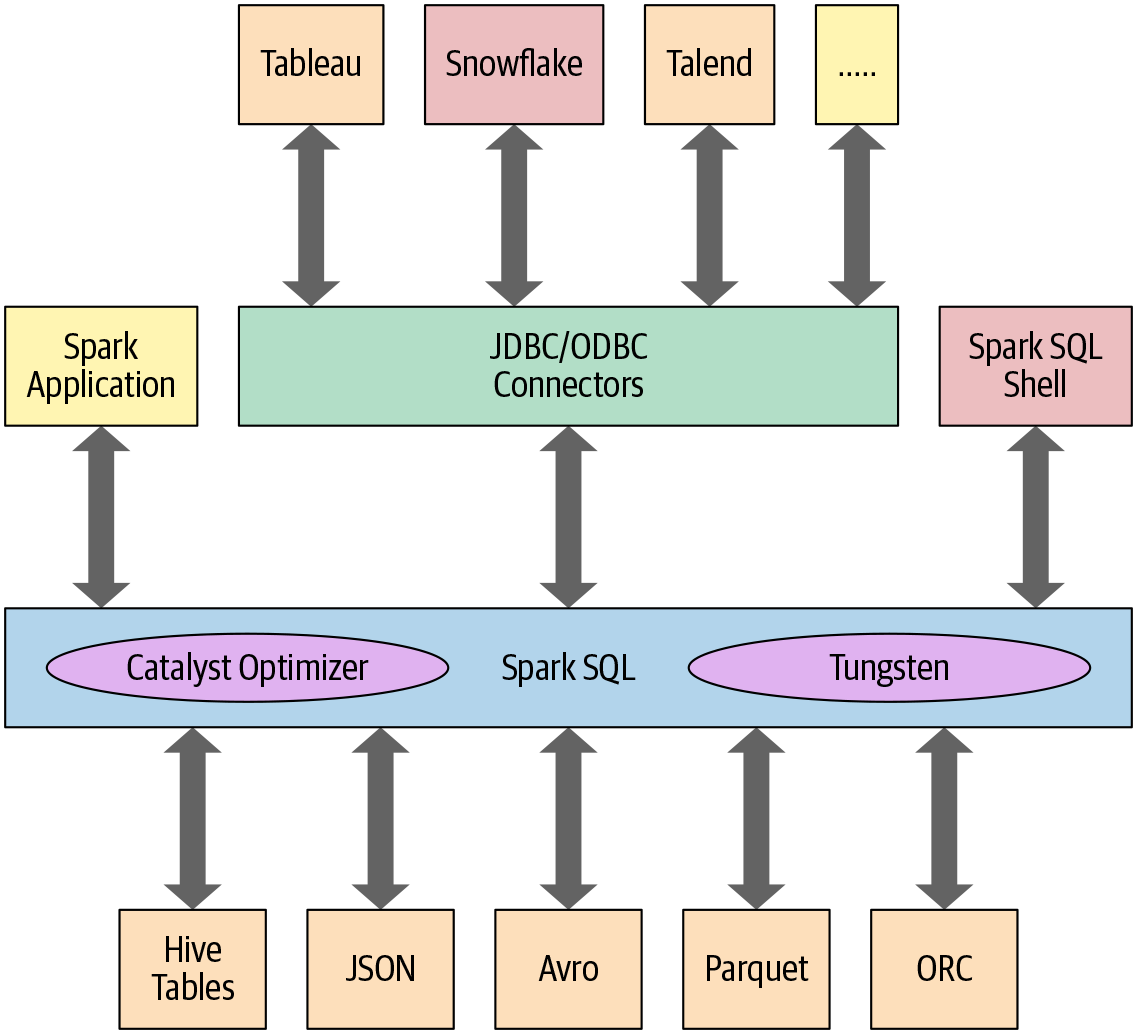 

-  At the core of the Spark SQL engine are the Catalyst optimizer and Project Tungsten.Together ,these support the ligh level Dataframe and Dataset API and SQL queries.
- The **Catalyst optimizer** takes a computational query and converts it into an execution plan.It goes through four transformational phases:
  1. Analysis
  2. Logical transformation
  3. Physical Planning
  4. Code generation
- Query optimizer for structured data
  - Works with Dataset, DataFrame, and SQL
  - Automatically transforms queries to execute efficiently
- Easily extended to support
  - New data sources including semi-structured data like JSON
  - "Smart" data stores to which you can push filters (e.g. HBase) – User-defined functions and type  
- Catalyst understands the data's schema and the queries
  - Providing many optimization opportunities
  - Operations evaluated lazily, so complete sequence can be analyzed for optimizations
  - Lambdas can't be analyzed (they are opaque)
- Tungsten is the codename for the umbrella project to make changes to Apache Spark’s execution engine that focuses on substantially improving the efficiency of memory and CPU for Spark applications, to push performance closer to the limits of modern hardware.  
- Substantially improves memory/CPU performance of Spark – CPU/memory are increasingly becoming bottlenecks
  - Spark I/O, network performance, and data storage are good (1)
  - They are utilized better, but memory/CPU utilization has not kept up
  - Pushes performance closer to hardware limits
- Stores in-memory data in off-heap binary format
  - Instead of in Java objects (on-heap)
  - Reduces memory size, eliminates garbage collection (GC) 
  - Can operate directly on binary data (no deserialization)
  - Understands and optimizes for different cache (L1, L2, ...)
- Generates code for expression evaluation 
  - No need to deserialize for many operations  

Catalyst is based on functional programming constructs in Scala and designed with these key two purposes:

1. Easily add new optimization techniques and features to Spark SQL
2. Enable external developers to extend the optimizer (e.g. adding data source specific rules, support for new data types, etc.)
When you execute code, Spark SQL uses Catalyst's general tree transformation framework in four phases, as shown below:




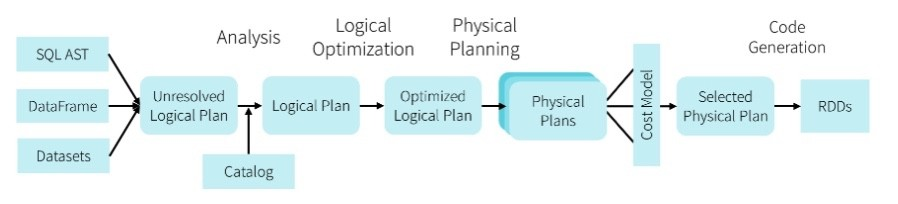

#### 1. Starting Point: SparkSession
- SparkSession class is the entry point for programming Spark with structured APIs.
- To create a basic SparkSession, just use SparkSession.builder().
- SparkSession in Spark 2.0 provides builtin support for Hive features including the ability to write queries using HiveQL, access to Hive UDFs, and the ability to read data from Hive tables. To use these features, you do not need to have an existing Hive setup.


In [1]:
#Build basic spark session
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL Demo") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/21 09:48:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
spark

#### 2. Creating Dataframe


In [ ]:
import pyspark
from pathlib import Path
import pandas as pd
import sys
path = Path.cwd().resolve().parents[0]
sys.path.append(str(path))
sys.path

In [ ]:

df=spark.read.json("../data/raw/CORD-NER-full.json")

In [ ]:
#To show loaded dataset
df.show()


In [ ]:
#shows the schema for dataset
df.printSchema()


In [ ]:
#To conver to pandas dataframe
df.toPandas()


In [ ]:
spark.stop()

### Loading dataset :
- Loading dataset using CSV:
  - spark.read.csv("file path of csv")  

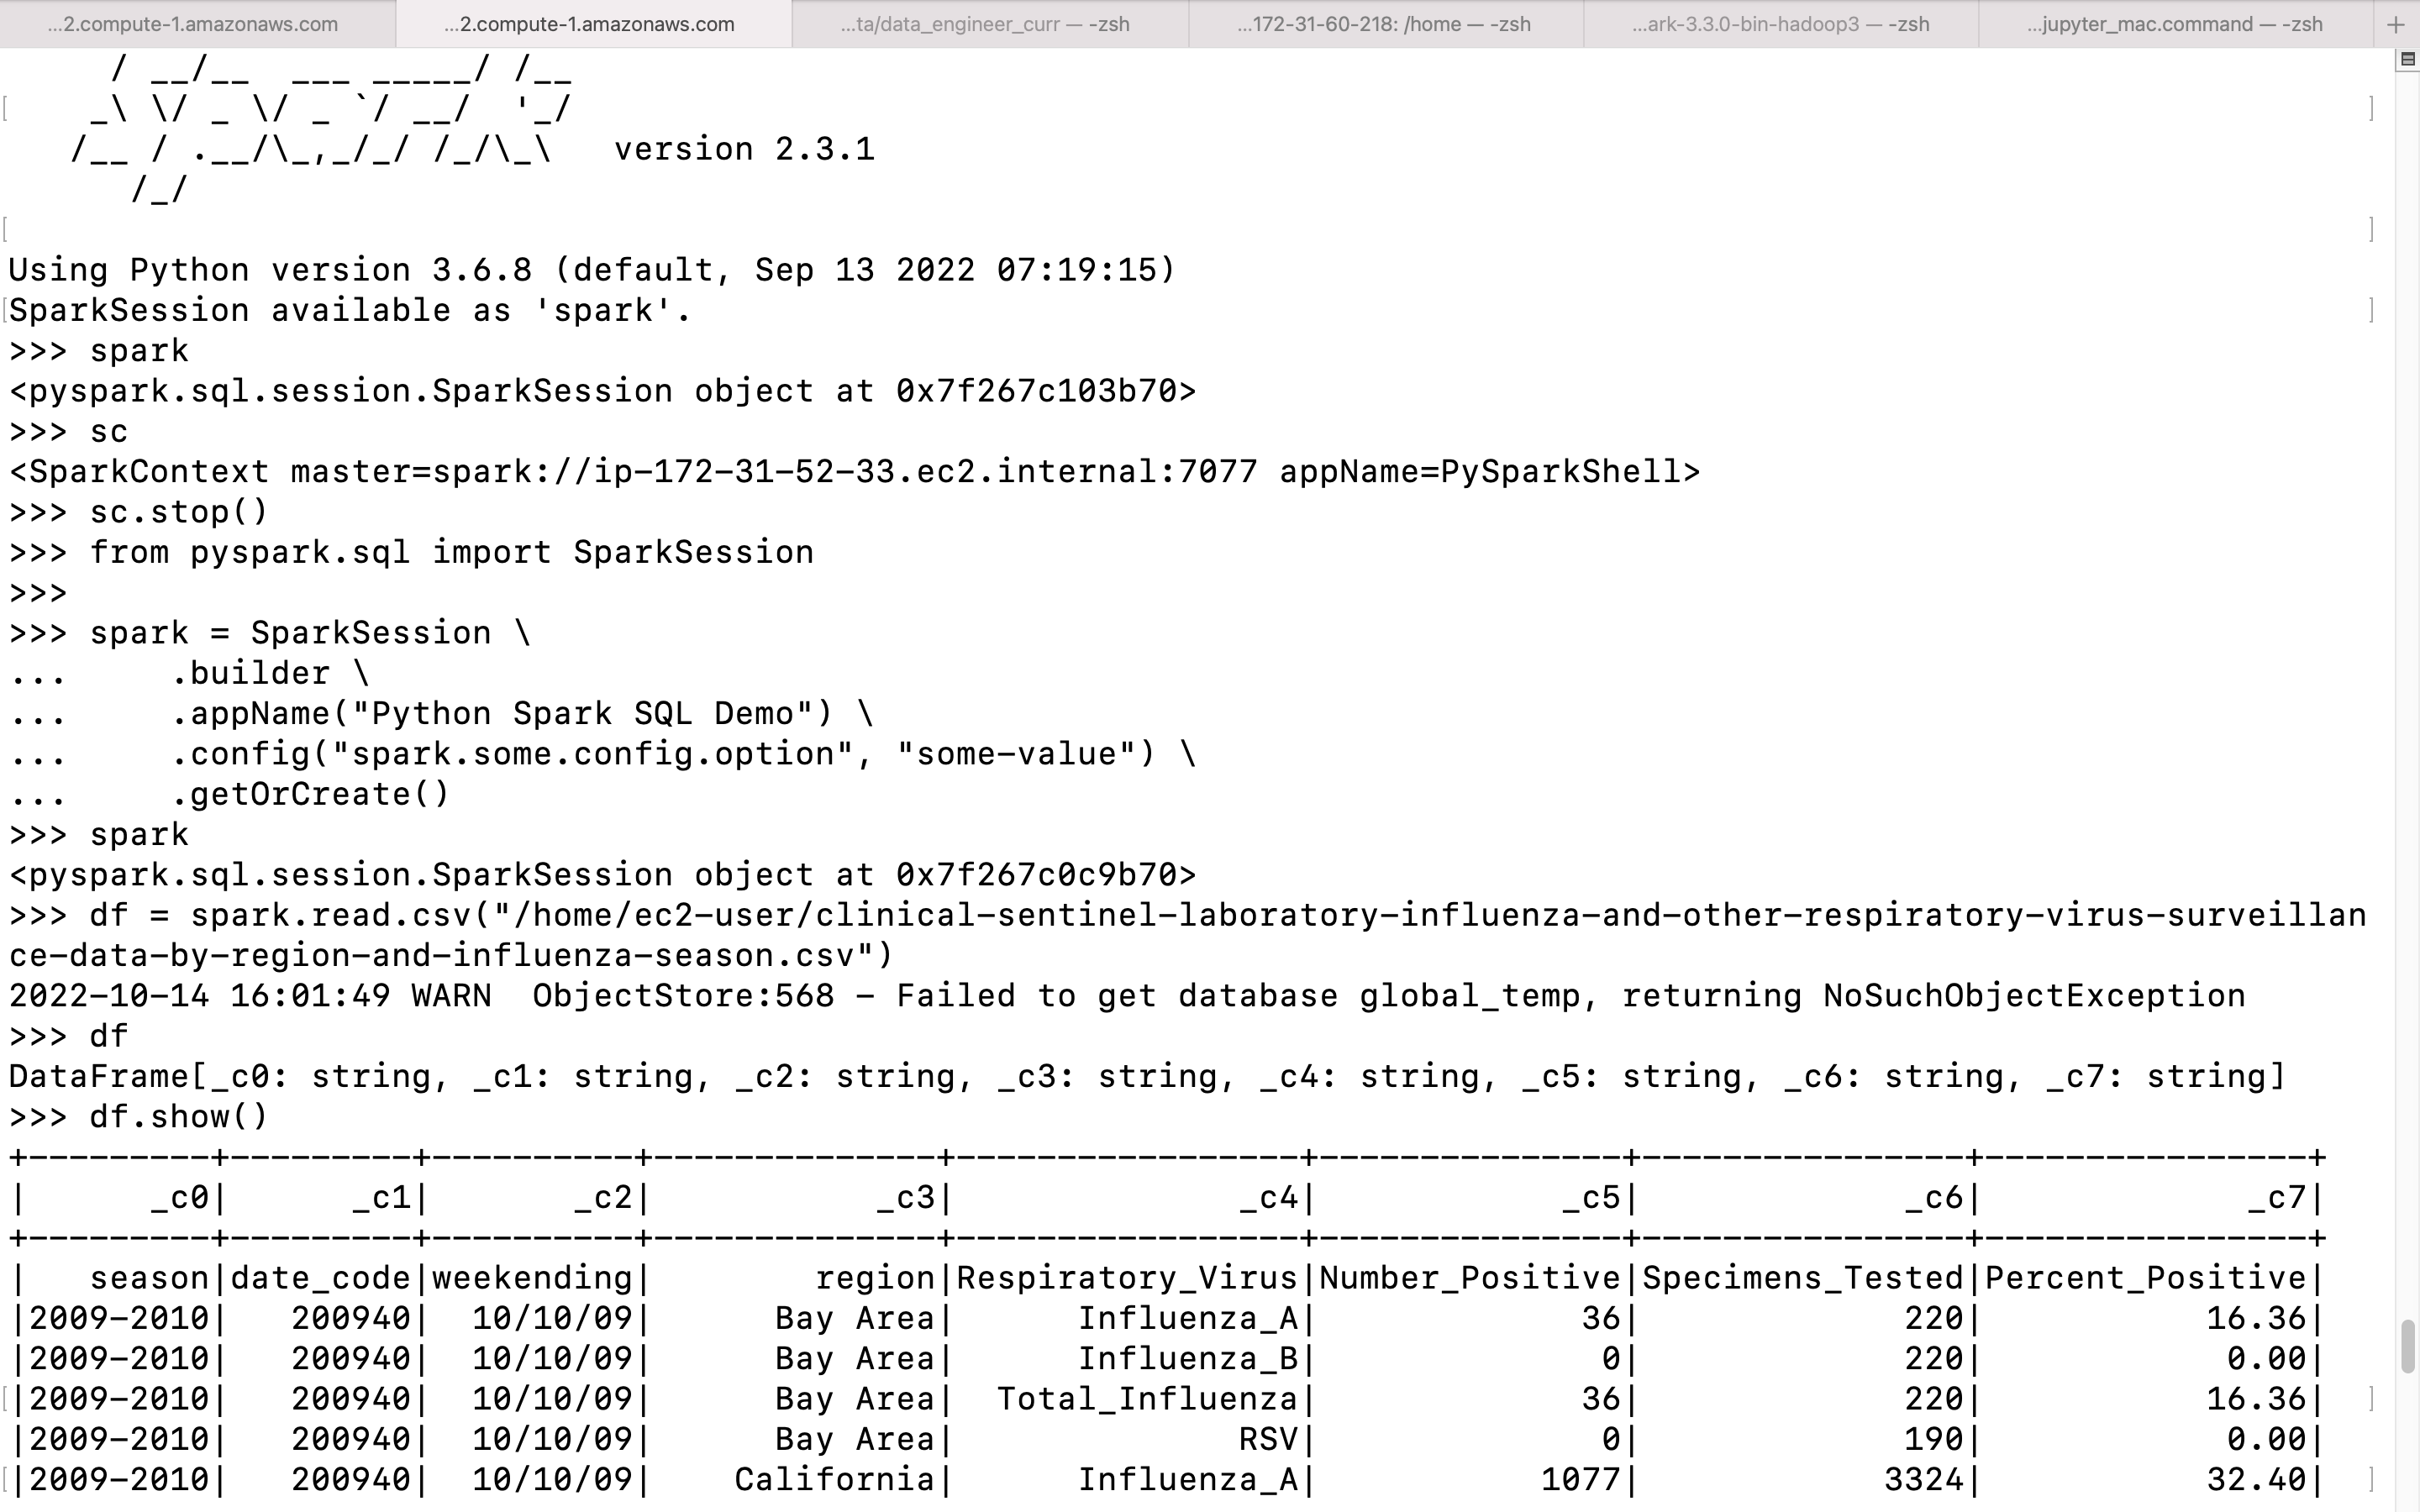

#### Spark web UI:
- Spark includes a graphical user interface that you can use to inspect or monitor Spark applications in their various stages of decomposition—that is jobs, stages, and tasks. Depending on how Spark is deployed, the driver launches a web UI, running by default on **port 4040**, where you can view metrics and details such as:
  - A list of scheduler stages and tasks
  - A summary of RDD sizes and memory usage
  - Information about the environment
  - Information about the running executors
  - All the Spark SQL queries

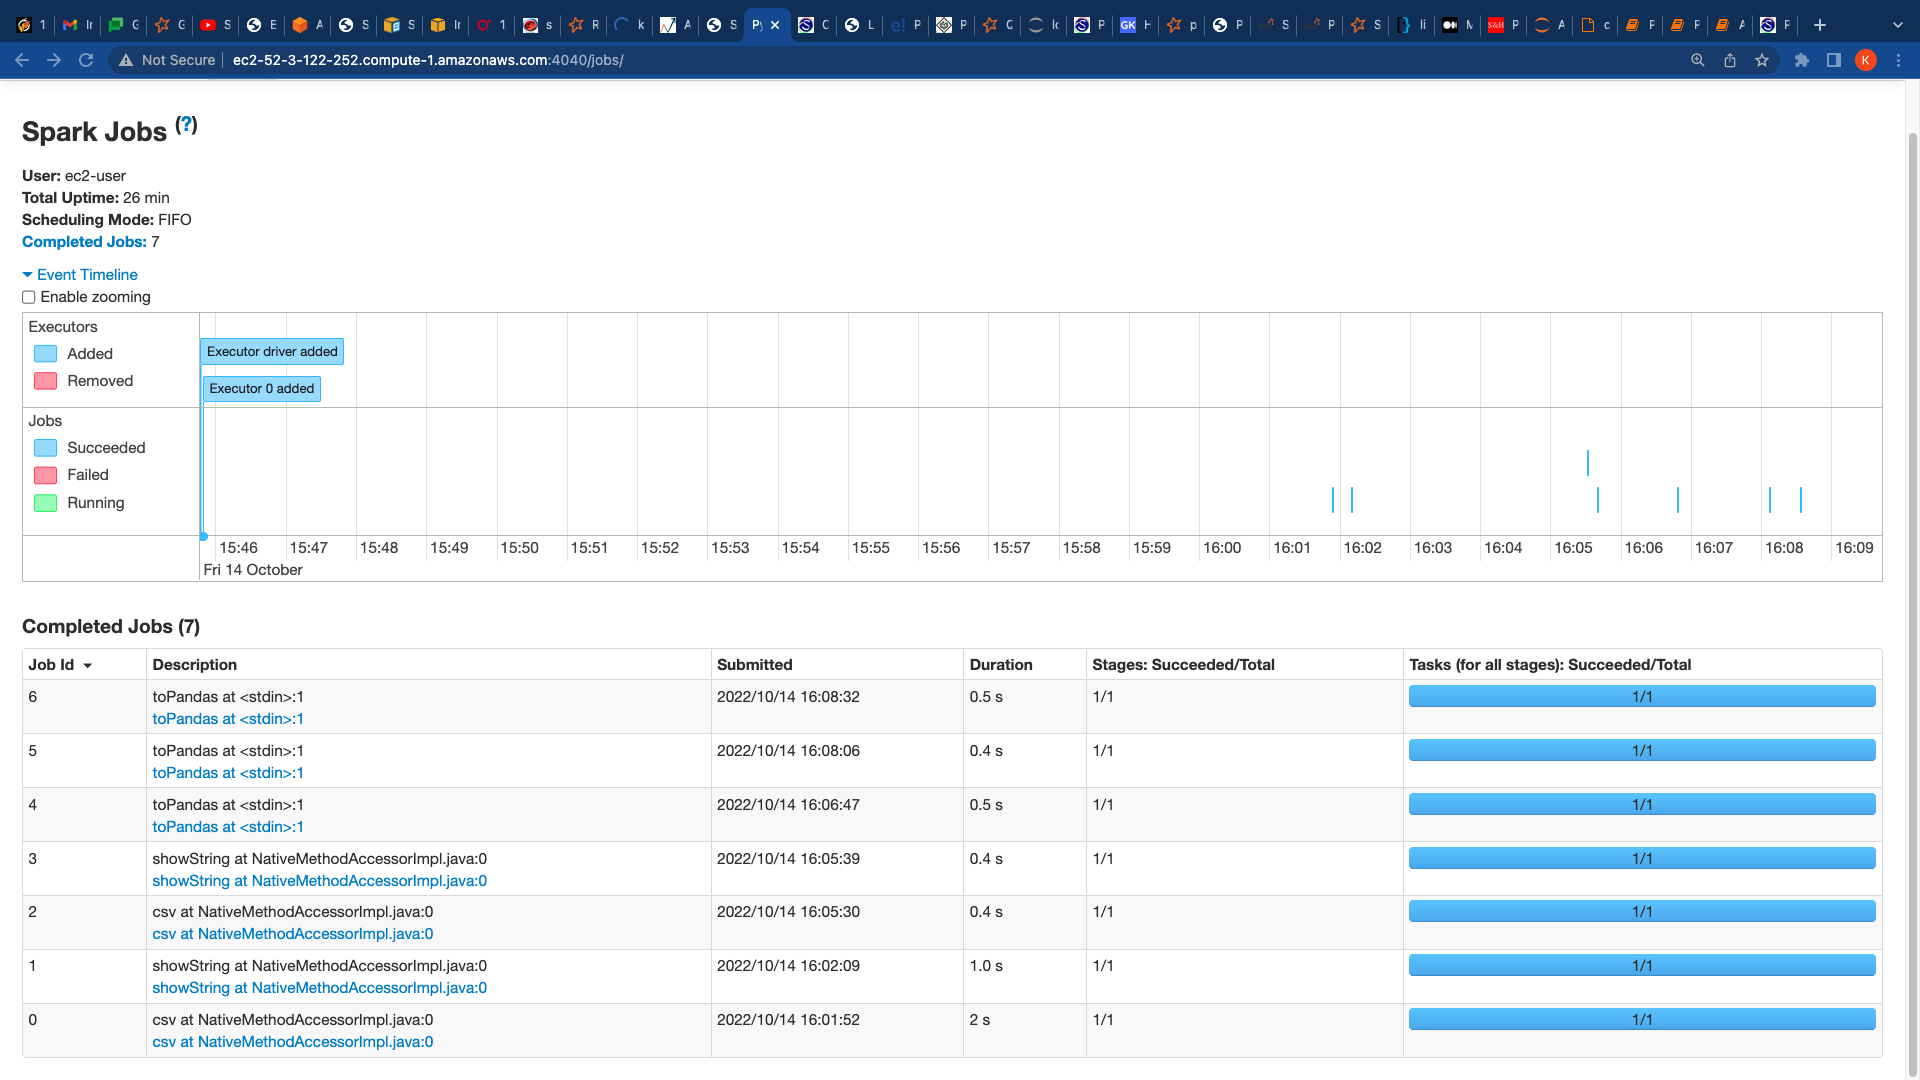

#### To view DAG visualization Click on Event timeline,select job from job list abd click it on view DAG visualization.
- DAG or Directed Acyclic Graph is defined as a set of the Vertices and the edges where the vertices represent Resilient distributed systems(RDD), and edges represent the Operation which is to be applied on RDD.

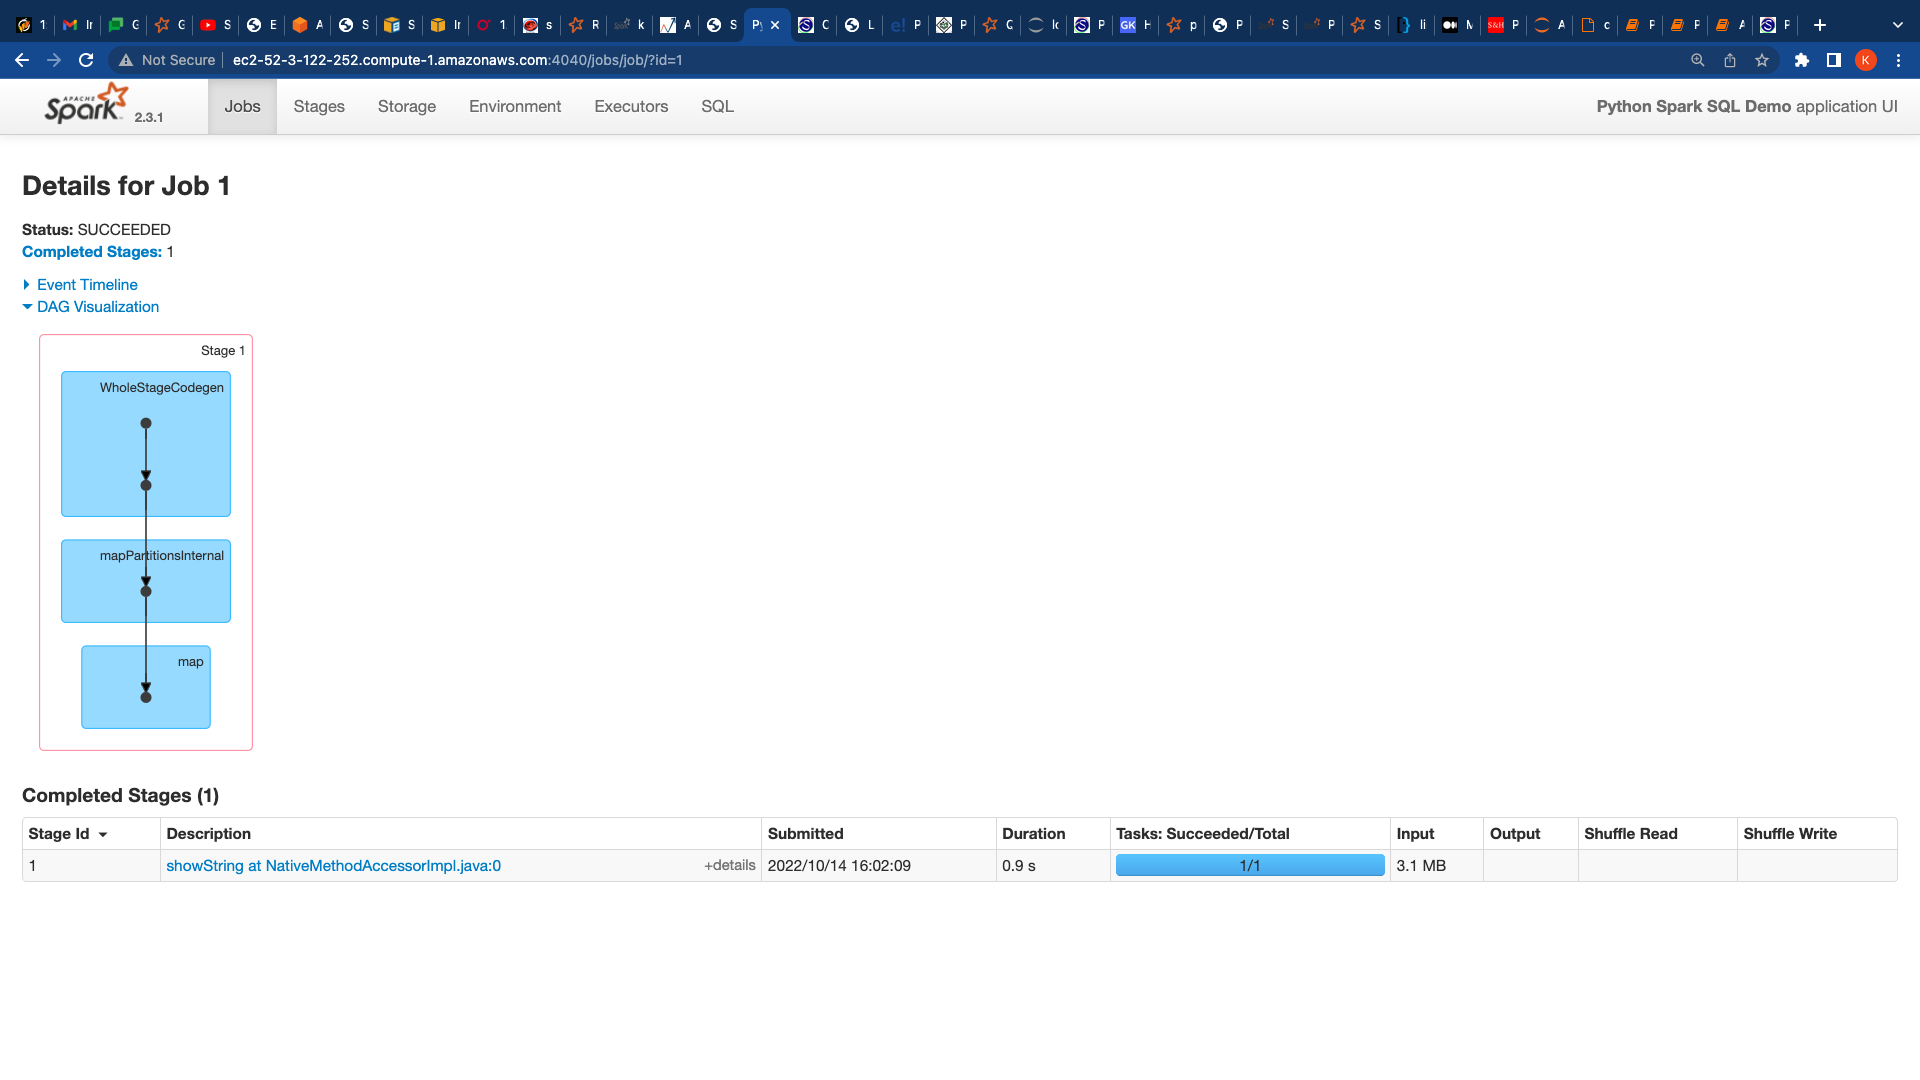

#### If you have a header with column names on your input file, you need to explicitly specify True for header option using option("header",True) not mentioning this, the API treats header as a data record.
- spark.read.option("header",True).csv("path to csv")

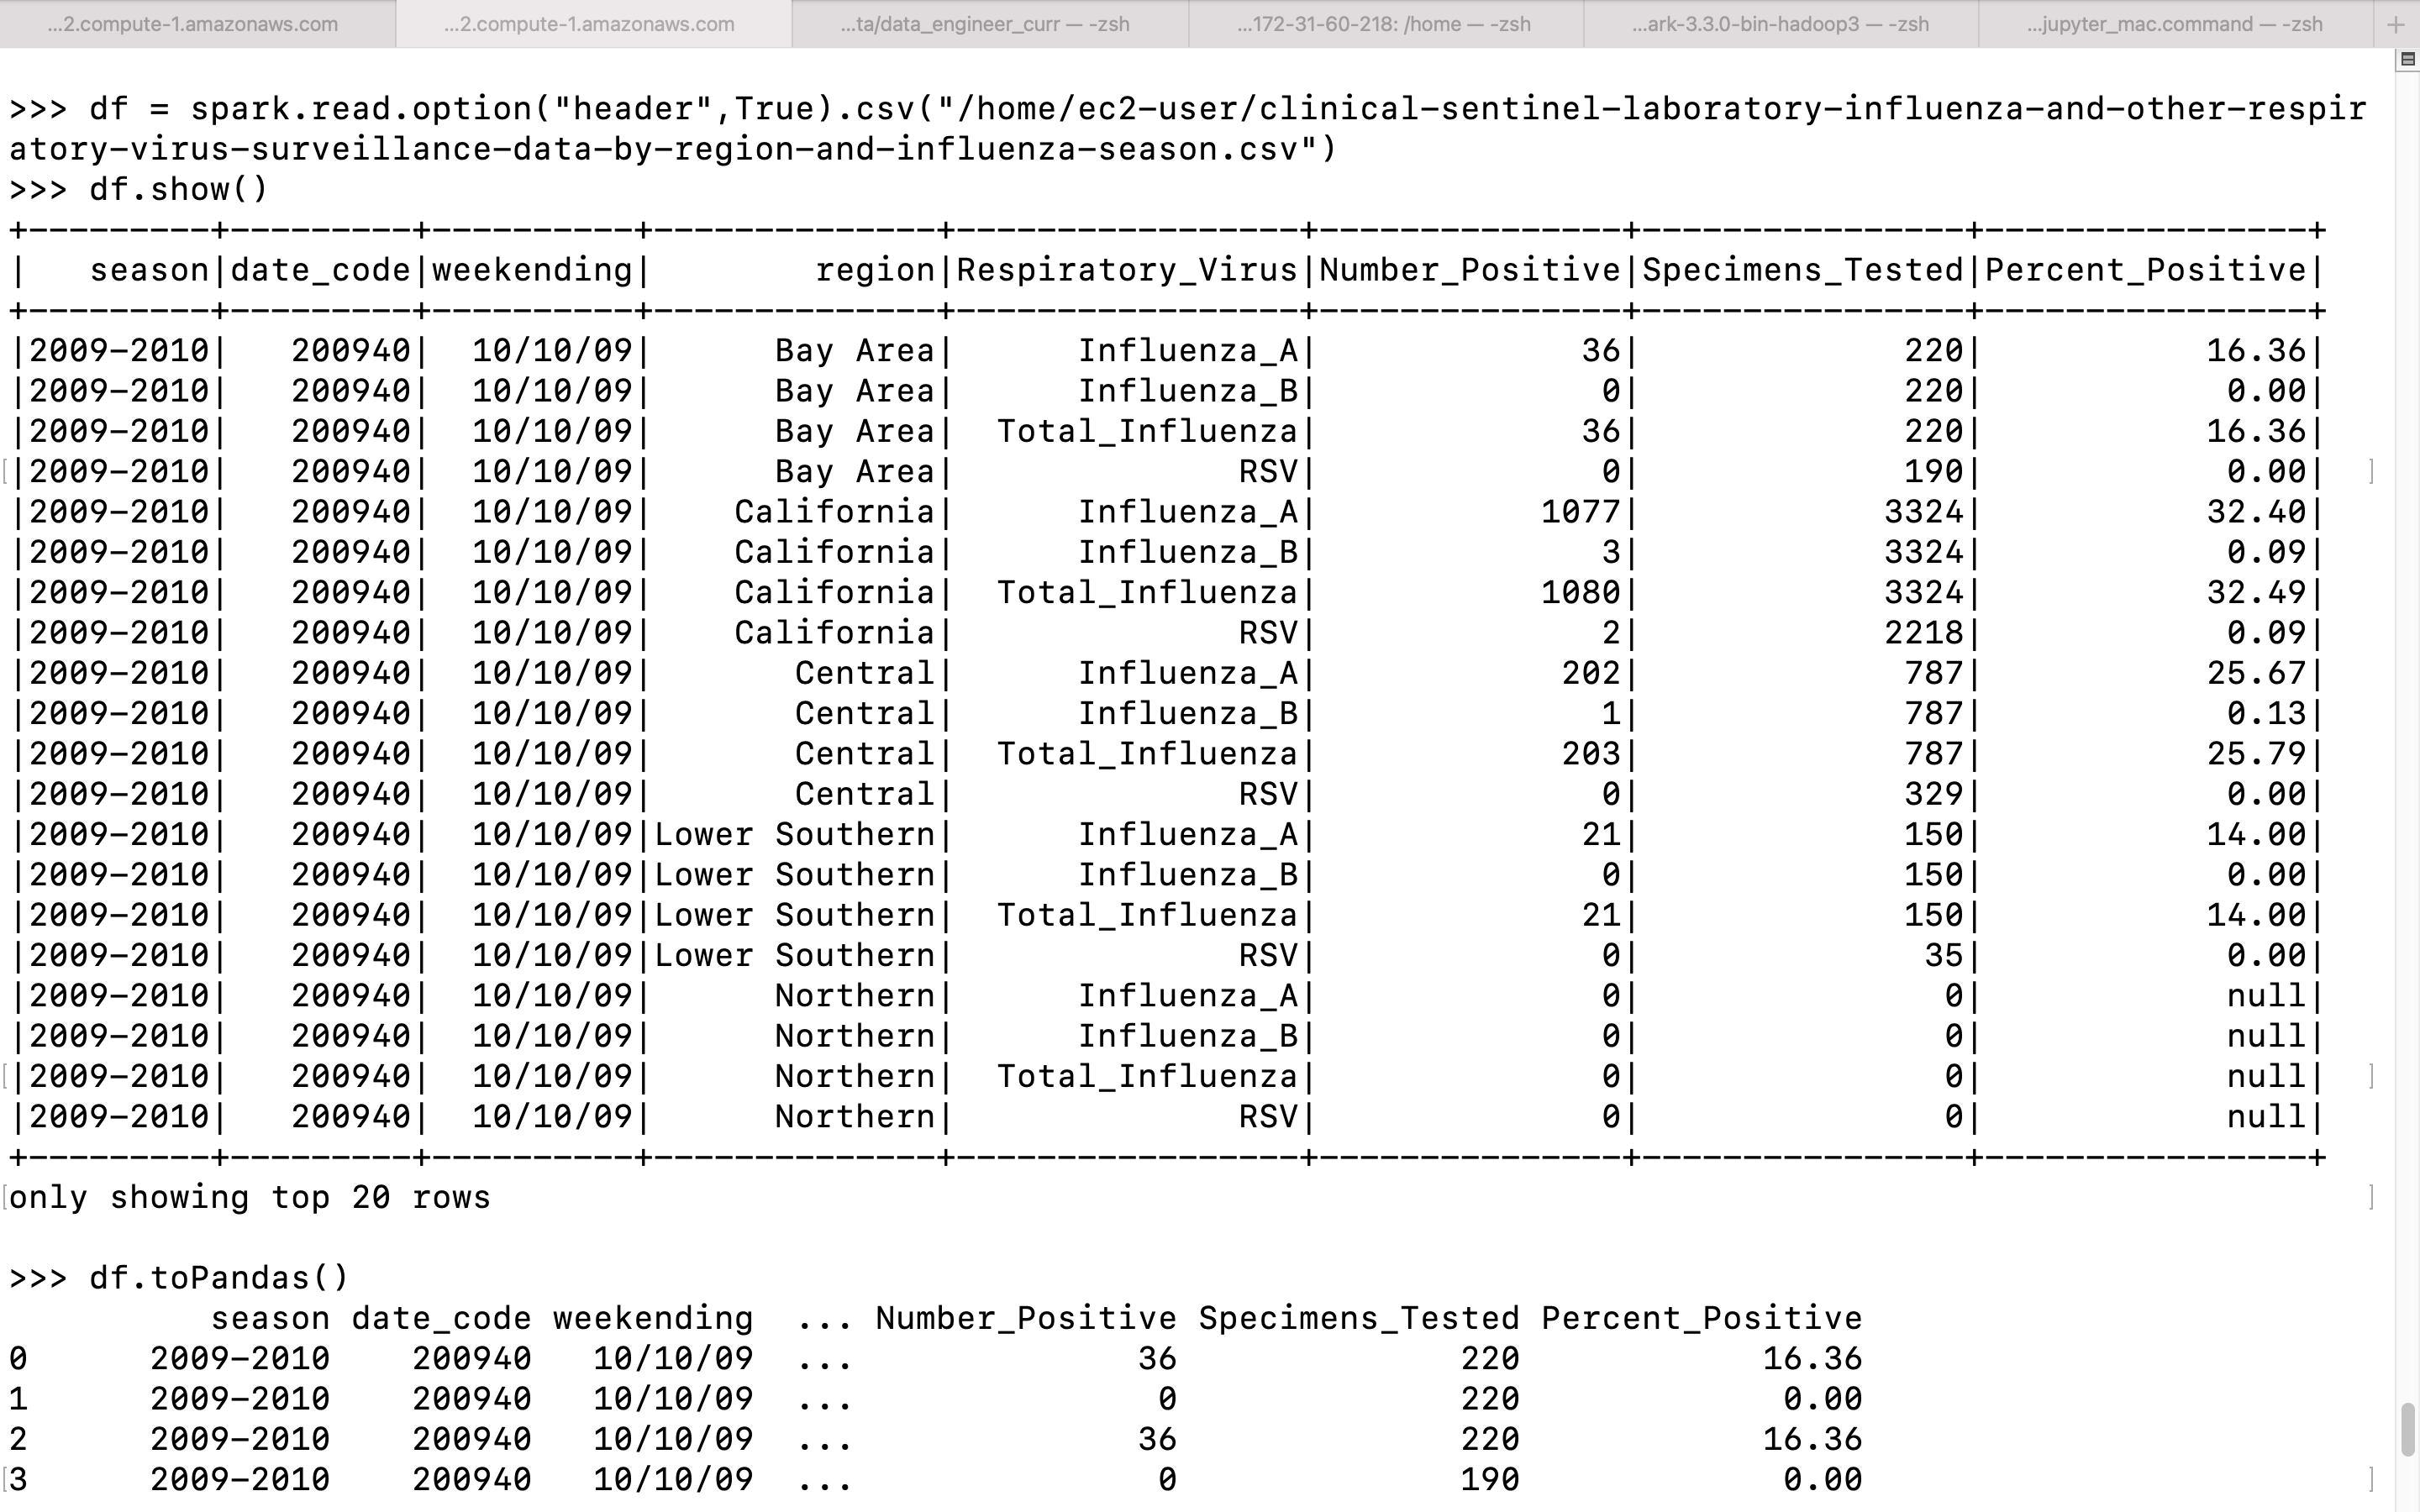

#### Usecase: 1.Executors get dead if there is no heartbeat in executors.

>>> df.coalesce(1).write.parquet("cordNer.parquet")
>>> 22/10/20 11:56:51 WARN HeartbeatReceiver: Removing executor 1 with no recent heartbeats: 1345311 ms exceeds timeout 120000 ms
22/10/20 11:56:51 WARN HeartbeatReceiver: Removing executor 0 with no recent heartbeats: 1349204 ms exceeds timeout 120000 ms
22/10/20 11:56:51 ERROR TaskSchedulerImpl: Lost executor 1 on 192.168.1.231: Executor heartbeat timed out after 1345311 ms
22/10/20 11:56:51 ERROR TaskSchedulerImpl: Lost executor 0 on 192.168.1.231: Executor heartbeat timed out after 1349204 ms

#### Declare a Schema Explicitly :
- Spark allows you to define a schema in two ways. One is to define it programmatically, and the other is to employ a Data Definition Language (DDL) string, which is much simpler and easier to read.
- ##### A schema in Spark defines the column names and associated data types for a Data‐ Frame. 
- ##### PySpark SQL Types class is a base class of all data types in PuSpark which defined in a package pyspark.sql.types.DataType and they are used to create DataFrame with a specific type.
- ##### DataType class is a base class for all PySpark Types.
- ##### Spark’s Basic Data Types
  - Spark supports basic internal data types. These data types can be declared in your Spark application or defined in your schema. 
  - StringType,ShortType,IntegerType,,LongType,FloatType,DateType,DoubleType,DecimalType,BooleanType,NullType
- ##### Spark’s Structured and Complex Data Types 
  - MapType,StructType,,ArrayType,TimestampType,CalendarIntervalType,HiveStringType,ObjectType,NumericType,ByteTypeBinaryType
- ##### To declare a schema Explicitly use StructType from pyspark.sql.types 
  - Struct type, consisting of a list of StructField(A field in StructType).
    - **struct1 = StructType([StructField("f1", StringType(), True)])**
  - class pyspark.sql.types.StructField(name, dataType, nullable=True, metadata=None)
  - Also, we can use add(field, data_type=None, nullable=True, metadata=None)
    - **struct2 = StructType().add("f1", StringType(), True).add("f2", StringType(), True, None)**
  

In [8]:
from pyspark.sql.types import *
myschema= StructType().add("Name",StringType()).add("Gender",StringType()).add("Age",IntegerType())
myschema1=StructType([StructField("Name",StringType()),StructField("Gender",StringType()),StructField("Age",IntegerType())])

In [9]:
myschema.fieldNames()

['Name', 'Gender', 'Age']

In [10]:
myschema1.fieldNames()

['Name', 'Gender', 'Age']

In [12]:
#define row values
data = [("James","M",30),
    ("Michael","M",40),
    ("Robert","M",40),
    ("Maria","F",40),
    ("Jen","F",29)
  ]
# Create Dataframe
df = spark.createDataFrame(data=data,schema=myschema)

In [13]:
df.show()

+-------+------+---+
|   Name|Gender|Age|
+-------+------+---+
|  James|     M| 30|
|Michael|     M| 40|
| Robert|     M| 40|
|  Maria|     F| 40|
|    Jen|     F| 29|
+-------+------+---+



In [21]:
# Define schema for our data using DDL
myschemaddl=['Name','Gender','Age']

df1 = spark.createDataFrame(data=data,schema=myschemaddl)
df1.show()
df1.printSchema()

+-------+------+---+
|   Name|Gender|Age|
+-------+------+---+
|  James|     M| 30|
|Michael|     M| 40|
| Robert|     M| 40|
|  Maria|     F| 40|
|    Jen|     F| 29|
+-------+------+---+

root
 |-- Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: long (nullable = true)



### Lab3.1:
- read/write data in several formats
- load text,json,csv data
- Look at the Web UI - Jobs pages after each load.
  - You'll see that the JSON load happens immediately, but there will be no job for the text load.
  - This is because Spark will scan the JSON file to infer the schema - more on this soon
- Call count on df: df.count()
- View some of the data in each resulting dataframe.df.show()
- Write data

#### Read and write Data in different formats
- ##### Different Data Formats:
  - Can read and write data in a variety of structured formats (e.g., JSON, Hive tables, Parquet, Avro, ORC, CSV)
- ##### Generic Load/Save Functions:
1. To load a default file you can use:
   - In the simplest form, the default data source (parquet unless otherwise configured by spark.sql.sources.default) will be used for all operations.
   - df = spark.read.load("examples/src/main/resources/users.parquet")
   - df.select("name", "favorite_color").write.save("namesAndFavColors.parquet")
   - Popular columnar data format (Apache project)
   - Binary storage, supporting efficient compression/encoding – Schema stored with data (file is self-describing)
   - Very efficient for column-based queries
   - Well supported in Hadoop ecosystem and elsewhere

2. To load a JSON file you can use:
   - JSON: (JavaScript Object Notation)
   - Lightweight data interchange format
   - Read via DataFrameReader.json()
   - Can automatically infer the schema (more on schema later)
   - df = spark.read.load("examples/src/main/resources/people.json", format="json")
   - df.select("name", "age").write.save("namesAndAges.parquet", format="parquet")
3. To Load a csv file you can use:
    - CSV: (Comma Separated Values)
    - Simple file format for tabular data
    - Read via DataFrameReader.csv()
    - Can automatically infer the schema
   - df= spark.read.load("/users/kirtikamerkar/austincapitaldata/data_engineer_curr/data/raw/worldBank/WDIData.csv",format="csv")
4. To load ORC file:
   - Apache ORC is a columnar format which has more advanced features like native zstd compression, bloom filter and columnar encryption.
   - Hybrid row/column format 
   - Stores rows, within rows data stored in columnar format
   - Commonly used in Hive data stores
   - Spark can read using its Hive support
5. Free form text
   -  Read via DataFrameReader.text()
   - Generally parse text and apply a schema manually
- etc ...

### DataFrame API : Operation Categories
#### Actions: Retrieve data, display it, process locally
- e.g. collect(), first(), etc. - many similar to RDD actions
####  Basic Functions: General management
- e.g. cache(), unpersist(), schema, explain(), write
#### Dataframe transformation:
- Some are familiar from RDD, e.g. filter
  - filter(condition)
  - Can take a Column instance or a string SQL expression 
- Others are more SQL-like
  - select(), groupBy(), join(), agg() (aggregate)

#### Working With HIVE:
- Spark SQL also supports reading and writing data stored in Apache Hive.
- Apache Hive is distributed, fault-tolerant data warehouse system that enables analytics at a massive scale.
- A data warehouse provides a central store of information that can easily be analyzed to make informed, data driven decisions. 
- Hive allows users to read, write, and manage petabytes of data using SQL.
- However, since Hive has a large number of dependencies, these dependencies are not included in the default Spark distribution.
- If Hive dependencies can be found on the classpath, Spark will load them automatically.
- It is mandatory to have all these depedencies present in th worker node to access to the Hive serialization and deserialization libraries (SerDes) in order to access data stored in Hive.
- Configuration of Hive is done by placing your hive-site.xml, core-site.xml (for security configuration), and hdfs-site.xml (for HDFS configuration) file in conf/.
- Must instantiate SparkSession with Hive support, including connectivity to a persistent Hive metastore, support for Hive serdes, and Hive user-defined functions.

#### References:
- https://www.linkedin.com/pulse/catalyst-tungsten-apache-sparks-speeding-engine-deepak-rajak#:~:text=Spark%20has%20optimized%20this%20operation,commonly%2C%20the%20Tungsten%20Binary%20Format.